In [1]:
import pandas as pd
import numpy as np

In [2]:
columns=['symboling','normalized-losses','make','fuel-type','aspiration','num-of-doors',           
'body-style','drive-wheels','engine-location','wheel-base','length','width',                    
'height','curb-weight','engine-type','num-of-cylinders','engine-size','fuel-system',
'bore','stroke','compression-ratio','horsepower','peak-rpm','city-mpg','highway-mpg','price']

datafile=pd.read_csv('imports-85.data',header=None)

In [3]:
cars=pd.DataFrame(datafile)

In [4]:
cars.columns=columns
cars.head(5)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [5]:
for i in columns:
    print(i,"->",cars[i].unique())

symboling -> [ 3  1  2  0 -1 -2]
normalized-losses -> ['?' '164' '158' '192' '188' '121' '98' '81' '118' '148' '110' '145' '137'
 '101' '78' '106' '85' '107' '104' '113' '150' '129' '115' '93' '142'
 '161' '153' '125' '128' '122' '103' '168' '108' '194' '231' '119' '154'
 '74' '186' '83' '102' '89' '87' '77' '91' '134' '65' '197' '90' '94'
 '256' '95']
make -> ['alfa-romero' 'audi' 'bmw' 'chevrolet' 'dodge' 'honda' 'isuzu' 'jaguar'
 'mazda' 'mercedes-benz' 'mercury' 'mitsubishi' 'nissan' 'peugot'
 'plymouth' 'porsche' 'renault' 'saab' 'subaru' 'toyota' 'volkswagen'
 'volvo']
fuel-type -> ['gas' 'diesel']
aspiration -> ['std' 'turbo']
num-of-doors -> ['two' 'four' '?']
body-style -> ['convertible' 'hatchback' 'sedan' 'wagon' 'hardtop']
drive-wheels -> ['rwd' 'fwd' '4wd']
engine-location -> ['front' 'rear']
wheel-base -> [ 88.6  94.5  99.8  99.4 105.8  99.5 101.2 103.5 110.   88.4  93.7 103.3
  95.9  86.6  96.5  94.3  96.  113.  102.   93.1  95.3  98.8 104.9 106.7
 115.6  96.6 120.9 112.

In [6]:
#nominal=,num-of-doors,
#numerical=bore,stroke,peak-rpm,price,normalized-losses
newcars=cars.copy()
newcars=cars.drop('num-of-doors',axis=1)

In [7]:
newcars.head(5)
#len(newcars.columns) -> 25 

,symboling,normalized-losses,make,fuel-type,aspiration,body-style,drive-wheels,engine-location,wheel-base,length,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,hatchback,rwd,front,94.5,171.2,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,sedan,fwd,front,99.8,176.6,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,sedan,4wd,front,99.4,176.6,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [8]:
features=['symboling','normalized-losses','wheel-base','length','width','height','curb-weight',
'engine-size','bore','stroke','compression-ratio','horsepower','peak-rpm',
'city-mpg','highway-mpg']

In [9]:
newcars2=newcars[features]

In [10]:
newcars2

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg
0,3,?,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.00,111,5000,21,27
1,3,?,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.00,111,5000,21,27
2,1,?,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.00,154,5000,19,26
3,2,164,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.00,102,5500,24,30
4,2,164,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.00,115,5500,18,22
5,2,?,99.8,177.3,66.3,53.1,2507,136,3.19,3.40,8.50,110,5500,19,25
6,1,158,105.8,192.7,71.4,55.7,2844,136,3.19,3.40,8.50,110,5500,19,25
7,1,?,105.8,192.7,71.4,55.7,2954,136,3.19,3.40,8.50,110,5500,19,25
8,1,158,105.8,192.7,71.4,55.9,3086,131,3.13,3.40,8.30,140,5500,17,20
9,0,?,99.5,178.2,67.9,52.0,3053,131,3.13,3.40,7.00,160,5500,16,22


In [11]:
newcars=newcars.replace('?',np.nan)

In [12]:
newcars['normalized-losses'].astype(float)

0        NaN
1        NaN
2        NaN
3      164.0
4      164.0
5        NaN
6      158.0
7        NaN
8      158.0
9        NaN
10     192.0
11     192.0
12     188.0
13     188.0
14       NaN
15       NaN
16       NaN
17       NaN
18     121.0
19      98.0
20      81.0
21     118.0
22     118.0
23     118.0
24     148.0
25     148.0
26     148.0
27     148.0
28     110.0
29     145.0
       ...  
175     65.0
176     65.0
177     65.0
178    197.0
179    197.0
180     90.0
181      NaN
182    122.0
183    122.0
184     94.0
185     94.0
186     94.0
187     94.0
188     94.0
189      NaN
190    256.0
191      NaN
192      NaN
193      NaN
194    103.0
195     74.0
196    103.0
197     74.0
198    103.0
199     74.0
200     95.0
201     95.0
202     95.0
203     95.0
204     95.0
Name: normalized-losses, Length: 205, dtype: float64

In [13]:
newcars.isnull().sum()

symboling             0
normalized-losses    41
make                  0
fuel-type             0
aspiration            0
body-style            0
drive-wheels          0
engine-location       0
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-type           0
num-of-cylinders      0
engine-size           0
fuel-system           0
bore                  4
stroke                4
compression-ratio     0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64

In [14]:
newcars.drop('normalized-losses',axis=1,inplace=True)

In [15]:
newcars = newcars.dropna(axis = 0, how = 'any')

In [16]:
newcars.dtypes

symboling              int64
make                  object
fuel-type             object
aspiration            object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                  object
stroke                object
compression-ratio    float64
horsepower            object
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                 object
dtype: object

In [17]:
newcars.head(10)

,symboling,make,fuel-type,aspiration,body-style,drive-wheels,engine-location,wheel-base,length,width,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,alfa-romero,gas,std,convertible,rwd,front,88.6,168.8,64.1,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,alfa-romero,gas,std,convertible,rwd,front,88.6,168.8,64.1,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,alfa-romero,gas,std,hatchback,rwd,front,94.5,171.2,65.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,audi,gas,std,sedan,fwd,front,99.8,176.6,66.2,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,audi,gas,std,sedan,4wd,front,99.4,176.6,66.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
5,2,audi,gas,std,sedan,fwd,front,99.8,177.3,66.3,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250
6,1,audi,gas,std,sedan,fwd,front,105.8,192.7,71.4,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,17710
7,1,audi,gas,std,wagon,fwd,front,105.8,192.7,71.4,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,18920
8,1,audi,gas,turbo,sedan,fwd,front,105.8,192.7,71.4,...,131,mpfi,3.13,3.40,8.3,140,5500,17,20,23875
10,2,bmw,gas,std,sedan,rwd,front,101.2,176.8,64.8,...,108,mpfi,3.50,2.80,8.8,101,5800,23,29,16430


In [18]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

newdf = newcars.select_dtypes(include=numerics)

In [19]:
newdf.head(10)

,symboling,wheel-base,length,width,height,curb-weight,engine-size,compression-ratio,city-mpg,highway-mpg
0,3,88.6,168.8,64.1,48.8,2548,130,9.0,21,27
1,3,88.6,168.8,64.1,48.8,2548,130,9.0,21,27
2,1,94.5,171.2,65.5,52.4,2823,152,9.0,19,26
3,2,99.8,176.6,66.2,54.3,2337,109,10.0,24,30
4,2,99.4,176.6,66.4,54.3,2824,136,8.0,18,22
5,2,99.8,177.3,66.3,53.1,2507,136,8.5,19,25
6,1,105.8,192.7,71.4,55.7,2844,136,8.5,19,25
7,1,105.8,192.7,71.4,55.7,2954,136,8.5,19,25
8,1,105.8,192.7,71.4,55.9,3086,131,8.3,17,20
10,2,101.2,176.8,64.8,54.3,2395,108,8.8,23,29


In [20]:
newdf.isnull().sum()

symboling            0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-size          0
compression-ratio    0
city-mpg             0
highway-mpg          0
dtype: int64

In [21]:
normalized=(newdf-newdf.min())/(newdf.max()-newdf.min())

In [22]:
normalized.head(10)

,symboling,wheel-base,length,width,height,curb-weight,engine-size,compression-ratio,city-mpg,highway-mpg
0,1.0,0.058309,0.413433,0.324786,0.083333,0.411171,0.260377,0.12500,0.222222,0.289474
1,1.0,0.058309,0.413433,0.324786,0.083333,0.411171,0.260377,0.12500,0.222222,0.289474
2,0.6,0.230321,0.449254,0.444444,0.383333,0.517843,0.343396,0.12500,0.166667,0.263158
3,0.8,0.384840,0.529851,0.504274,0.541667,0.329325,0.181132,0.18750,0.305556,0.368421
4,0.8,0.373178,0.529851,0.521368,0.541667,0.518231,0.283019,0.06250,0.138889,0.157895
5,0.8,0.384840,0.540299,0.512821,0.441667,0.395268,0.283019,0.09375,0.166667,0.236842
6,0.6,0.559767,0.770149,0.948718,0.658333,0.525989,0.283019,0.09375,0.166667,0.236842
7,0.6,0.559767,0.770149,0.948718,0.658333,0.568658,0.283019,0.09375,0.166667,0.236842
8,0.6,0.559767,0.770149,0.948718,0.675000,0.619860,0.264151,0.08125,0.111111,0.105263
10,0.8,0.425656,0.532836,0.384615,0.541667,0.351823,0.177358,0.11250,0.277778,0.342105


In [23]:
target_col=newcars['price'].astype('float64')

symboling 8080.432824359725


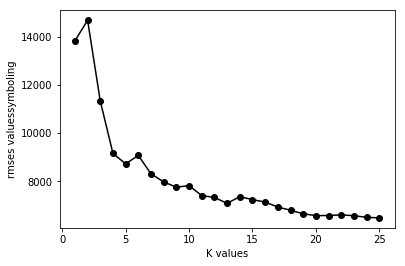

wheel-base 3475.863509608726


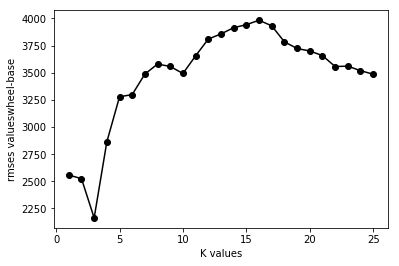

length 5671.187374957591


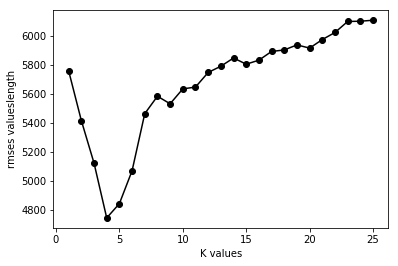

width 4320.290278389797


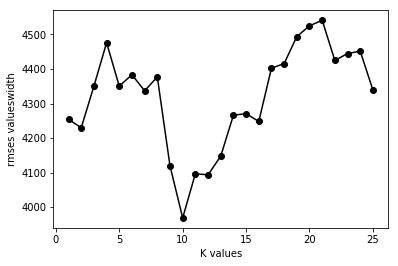

height 6265.8366932583


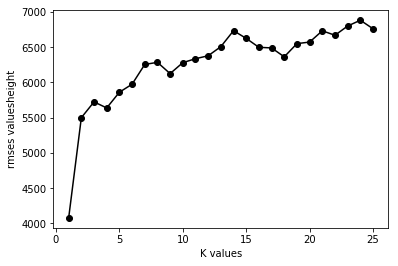

curb-weight 5141.116297202475


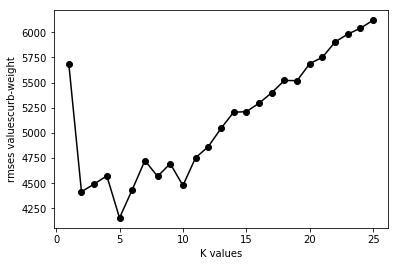

engine-size 3048.087850030759


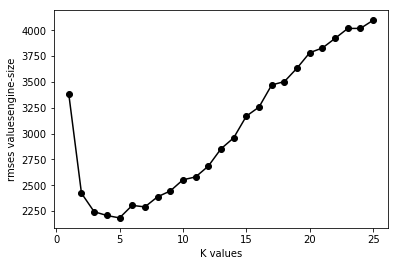

compression-ratio 6043.116078745282


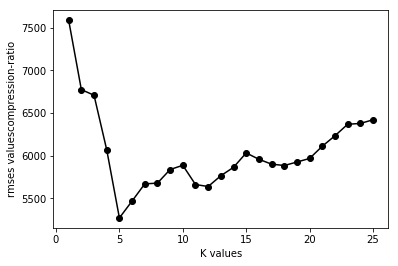

city-mpg 5665.696533334551


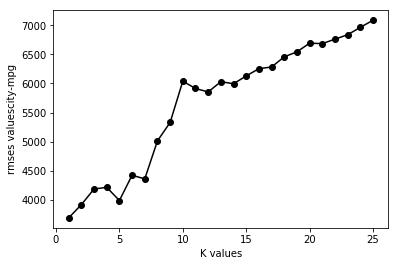

highway-mpg 4592.894596948894


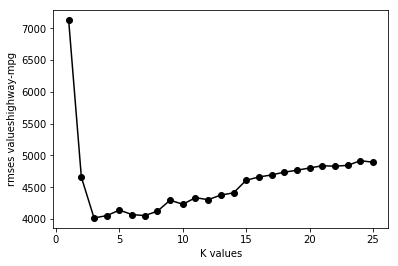

In [24]:
from sklearn.model_selection import train_test_split  
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
%matplotlib inline

def knn_train_test(train_column,target_column,normalized):
    X=normalized[[train_column]]
    y=target_column
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)
    klist=[i for i in range(1,26)]
    rmses=list()
    for i in klist:
        knn = KNeighborsRegressor(n_neighbors=i) 
        knn.fit(X_train, y_train)
        predictions=knn.predict(X_test)
        mse=mean_squared_error(y_test,predictions)
        rmse=mse**(1/float(2))
        rmses.append(rmse)
    avgrmses=np.mean(rmses)
    avg.append(avgrmses)
    print(train_column,avgrmses)
    plt.plot(klist,rmses,'-ok')
    plt.xlabel('K values')
    ylabel='rmses values'+train_column
    plt.ylabel(ylabel)
    plt.show()
    rmses.clear()


avg=list()
for i in normalized.columns:
    knn_train_test(i,target_col,normalized)

Index(['symboling', 'wheel-base', 'length', 'width', 'height', 'curb-weight',
       'engine-size', 'compression-ratio', 'city-mpg', 'highway-mpg'],
      dtype='object') 10911279.284305342


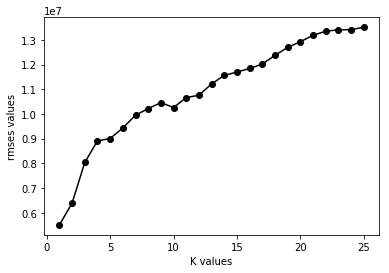

In [26]:
from sklearn.model_selection import train_test_split,cross_val_predict
from sklearn.cross_validation import cross_val_score,KFold
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
%matplotlib inline

def knn_train_test3(train_column,target_column,normalized):
    X=normalized[train_column]
    y=target_column   
    #X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)
    rmses=list()
    klist=[i for i in range(1,26)]
    kf=KFold(len(normalized),shuffle=True,random_state=1)
    for i in klist:
        knn=KNeighborsRegressor(n_neighbors=i)
        mse=list(cross_val_predict(knn,X,y,cv=kf))
        m=mean_squared_error(y,mse)
        rmse=m*(1/float(2))
        rmses.append(rmse)
    avgrmses=np.mean(rmses)
    avg2.append(avgrmses)
    print(train_column,avgrmses)
    plt.plot(klist,rmses,'-ok')
    plt.xlabel('K values')
    ylabel='rmses values'
    plt.ylabel(ylabel)
    plt.show()
    rmses.clear()


avg2=list()
knn_train_test3(normalized.columns,target_col,normalized)

In [27]:
avg

[8080.432824359725,
 3475.863509608726,
 5671.187374957591,
 4320.290278389797,
 6265.8366932583,
 5141.116297202475,
 3048.087850030759,
 6043.116078745282,
 5665.696533334551,
 4592.894596948894]

In [28]:
normalized.columns

Index(['symboling', 'wheel-base', 'length', 'width', 'height', 'curb-weight',
       'engine-size', 'compression-ratio', 'city-mpg', 'highway-mpg'],
      dtype='object')

['engine-size', 'city-mpg'] 5000.065385841547


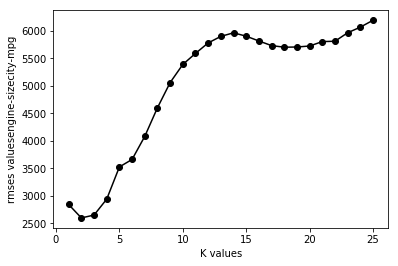

['engine-size', 'curb-weight', 'city-mpg'] 3700.4832526318073


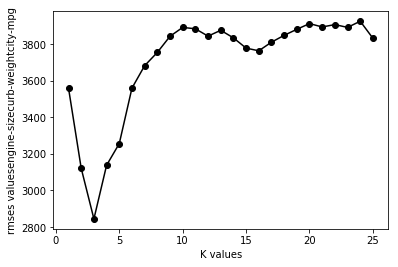

['engine-size', 'highway-mpg', 'city-mpg', 'curb-weight'] 3992.568274054495


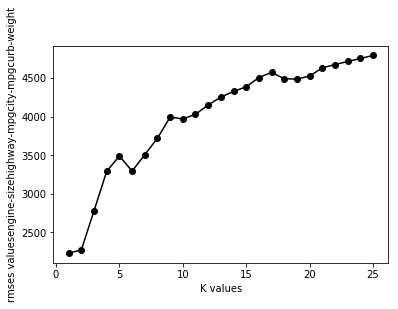

['engine-size', 'highway-mpg', 'city-mpg', 'curb-weight', 'width'] 3923.9221353101275


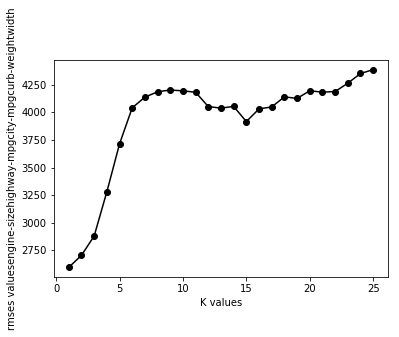

In [37]:
def knn_train_test2(train_column,target_column,normalized):
    X=normalized[train_column]
    y=target_column
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)
    klist=[i for i in range(1,26)]
    rmses=list()
    for i in klist:
        knn = KNeighborsRegressor(n_neighbors=i) 
        knn.fit(X_train, y_train)
        predictions=knn.predict(X_test)
        mse=mean_squared_error(y_test,predictions)
        rmse=mse**(1/float(2))
        rmses.append(rmse)
    avgrmses=np.mean(rmses)
    avg.append(avgrmses)
    print(train_column,avgrmses)
    plt.plot(klist,rmses,'-ok')
    plt.xlabel('K values')
    col=''.join(train_column)
    ylabel='rmses values'+col
    plt.ylabel(ylabel)
    plt.show()
    rmses.clear()



features2=['engine-size','city-mpg']
features3=['engine-size','curb-weight','city-mpg']
features4=['engine-size','highway-mpg','city-mpg','curb-weight']
features5=['engine-size','highway-mpg','city-mpg','curb-weight','width']

knn_train_test2(features2,target_col,normalized)
knn_train_test2(features3,target_col,normalized)
knn_train_test2(features4,target_col,normalized)
knn_train_test2(features5,target_col,normalized)
